In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import sys
import os
current = os.path.abspath('')
parent = os.path.dirname(current)
sys.path.append(parent)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

In [2]:
# # generate diagonal Boolean matrix

# n_row=200
# n_col=100
# k=5
# overlap=[0.2, 0.1, 0.2, 0.1]
# noise=[0.3, 0.1]

# X = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
# X.generate()
# X.add_noise(noise=noise, seed=1024)
# X.show_matrix(title="diagonal boolean matrix")

[I] m            : 2000
[I] n            : 1000
[I] k            : 50
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 2023
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


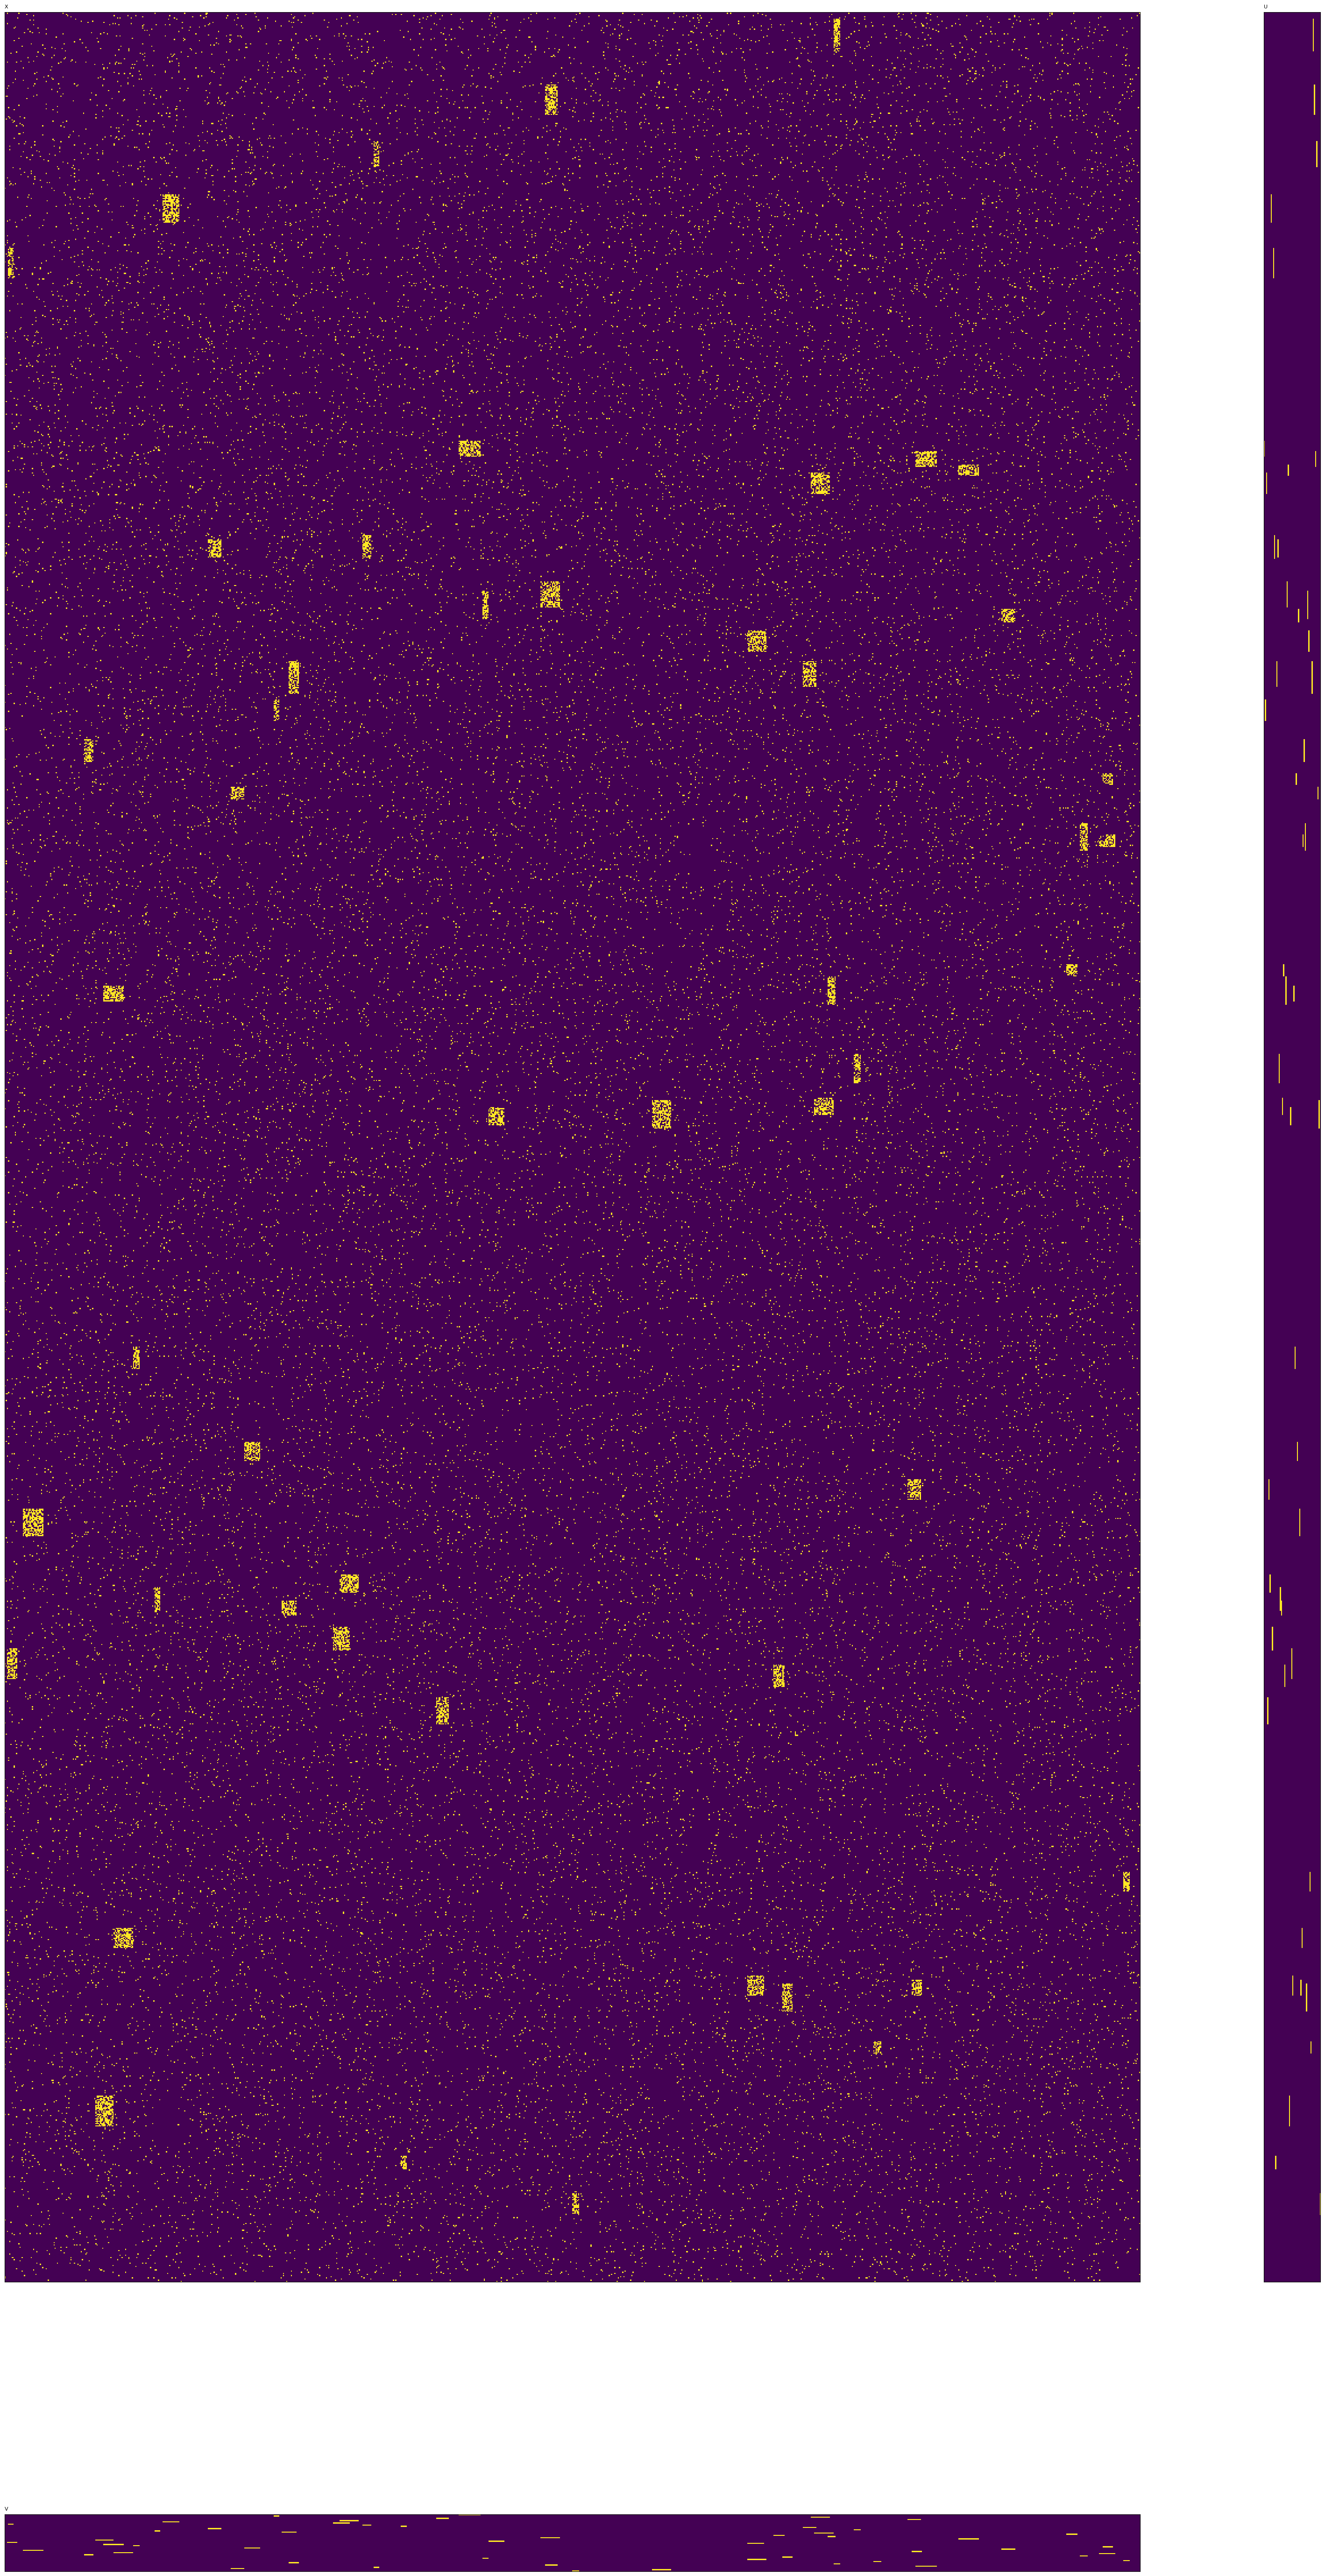

In [8]:
# generate arbitrary Boolean matrix (X)

n_row=2000
n_col=1000
k=50
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=2023) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(title='arbitrary boolean matrix X')

# # generate arbitrary Boolean matrix (Z)

# n_row=200
# n_col=1000
# k=5
# overlap=[0.2, 0.1, 0.2, 0.1]
# noise=[0.3, 0.1]

# Z = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
# Z.generate(seed=1997)
# Z.shuffle_factors(seed=2023)
# Z.V = X.V # replace one factor
# Z.boolean_matmul()
# Z.add_noise(noise=noise, seed=1024)
# Z.show_matrix(title="arbitrary boolean matrix Z")

In [4]:
from datasets import Dataset, GeneratedData
X_data = GeneratedData(bm=X, X_name='X', U_name='U', V_name='V')
Z_data = GeneratedData(bm=Z, X_name='Z', U_name='W', V_name='V')

# ds_train = Dataset()
# ds_train.load_data(X=X_data)
# ds_train.load_data(X=Z_data)
# ds_train.summarize()

In [5]:
# from datasets import Dataset, NetflixData, NetflixGenreData
# X_data = NetflixData(small=True)
# Z_data = NetflixGenreData(small=True)

# sum_u, sum_v = X_data.X.sum
# # idx_u = sum_u > 130
# # idx_v = sum_v > 200
# idx_u = sum_u > 40
# idx_v = sum_v > 60
# print(X_data.X.shape, sum(idx_u), sum(idx_v))

In [6]:
# # down-sampling by constraints

# X_data.sample(idx=idx_u, axis=0)
# print(X_data.X.shape)
# X_data.sample(idx=idx_v, axis=1)
# print(X_data.X.shape)
# Z_data.sample(idx=idx_v, axis=1)
# print(Z_data.X.shape)

In [7]:
# # down-sampling by random

# X_data.sample(n=1000, axis=0)
# print(X_data.X.shape)
# idx_v = X_data.sample(n=500, axis=1)
# print(X_data.X.shape)
# Z_data.sample(idx=idx_v, axis=1)
# print(Z_data.X.shape)

# k-fold cross-validation

[I] cross-validation, sampling positives
[I]   Data seed    : 1997
[I]   partition    : [0, 19617, 39234, 58850, 78466, 98082]
[I]   test_size    : 0.2
[I]   seed         : 1997
[I] getting cross-validation indices
[I]   current fold         : 1
[I]   current train size   : 78465
[I]   current val size     : 19617
[I] cross-validation, sampling negatives
[I]   Data seed    : 6666


100%|██████████| 6130/6130 [00:00<00:00, 14031.92it/s]
c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


[I]   n_negatives  : 6130
[I]   test_size    : 1226
[I]   seed         : 6666
[I] getting cross-validation indices
[I]   current fold         : 1
[I]   current train size   : 0
[I]   current val size     : 4904
[I] Mean num of Vs per U in X: 39.2
[I] Mean num of Us per V in X: 78.5
[I] Median num of Vs per U in X: 16.0
[I] Median num of Us per V in X: 35.0


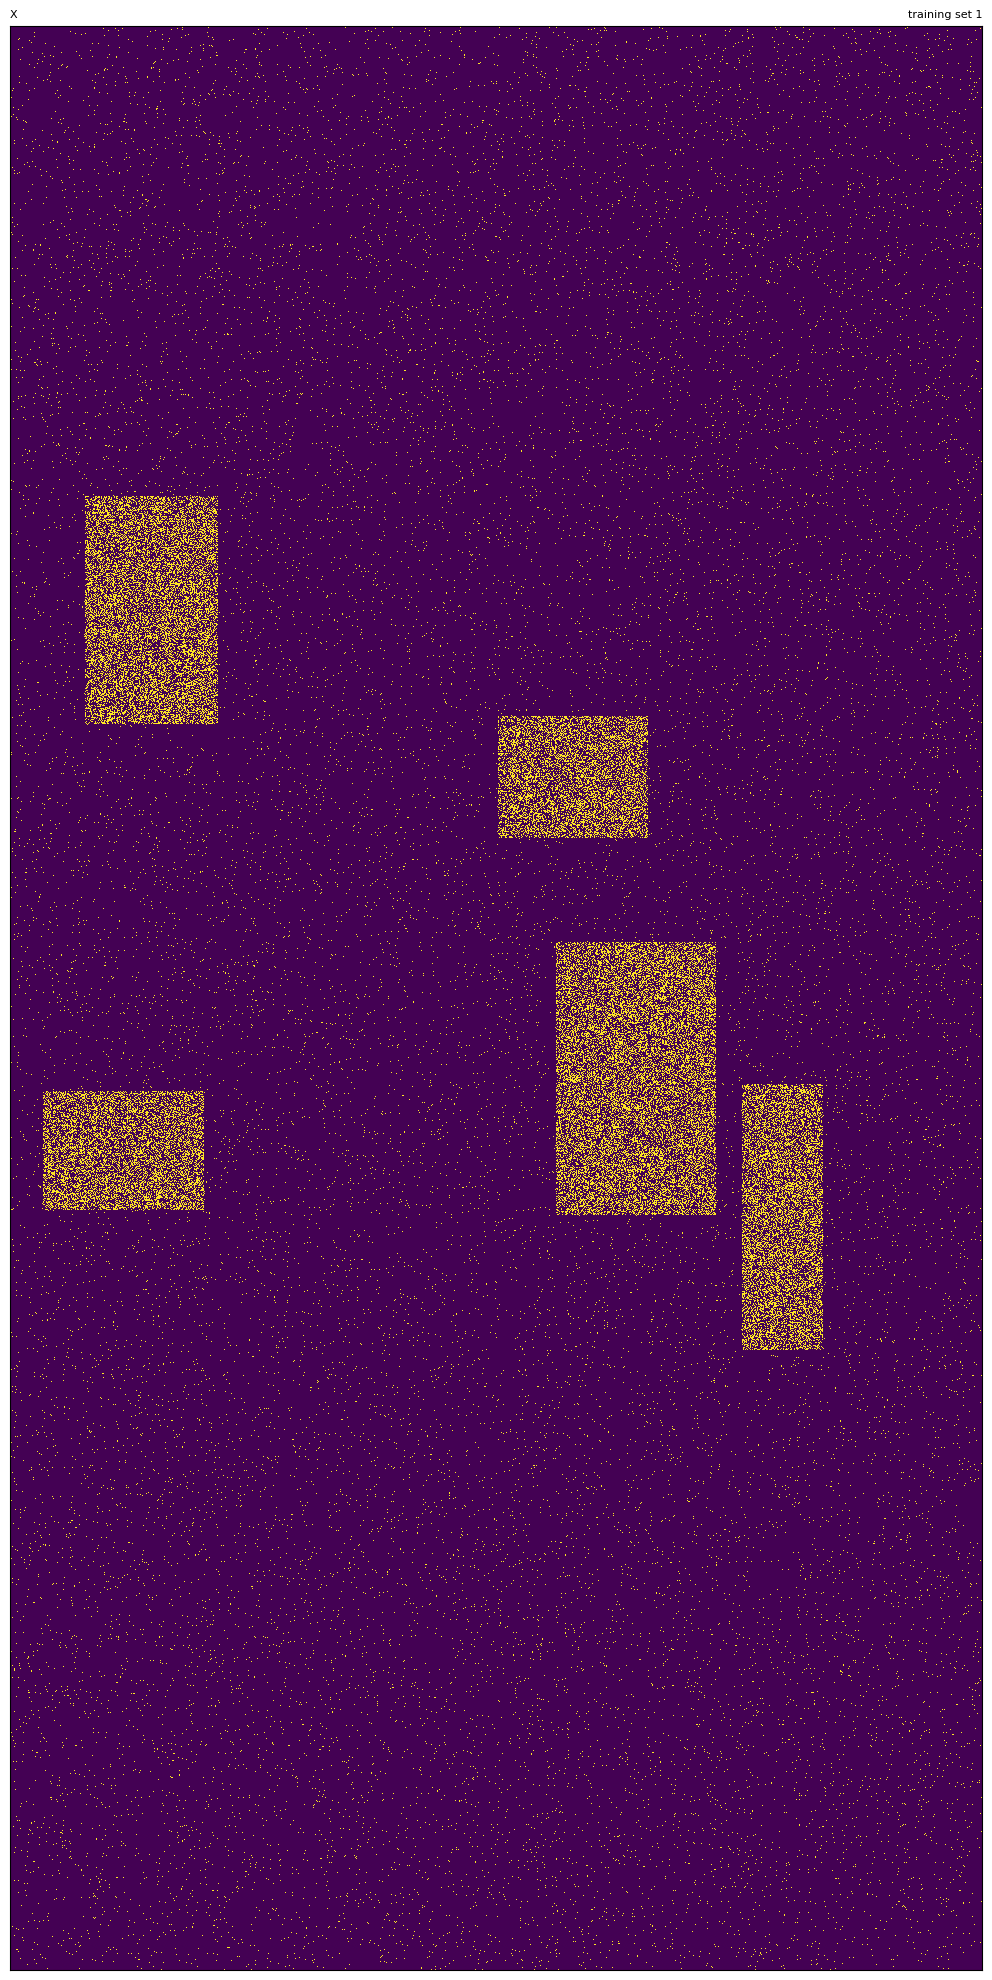

[I] Mean num of Vs per U in X: 9.8
[I] Mean num of Us per V in X: 19.6
[I] Median num of Vs per U in X: 5.0
[I] Median num of Us per V in X: 11.0


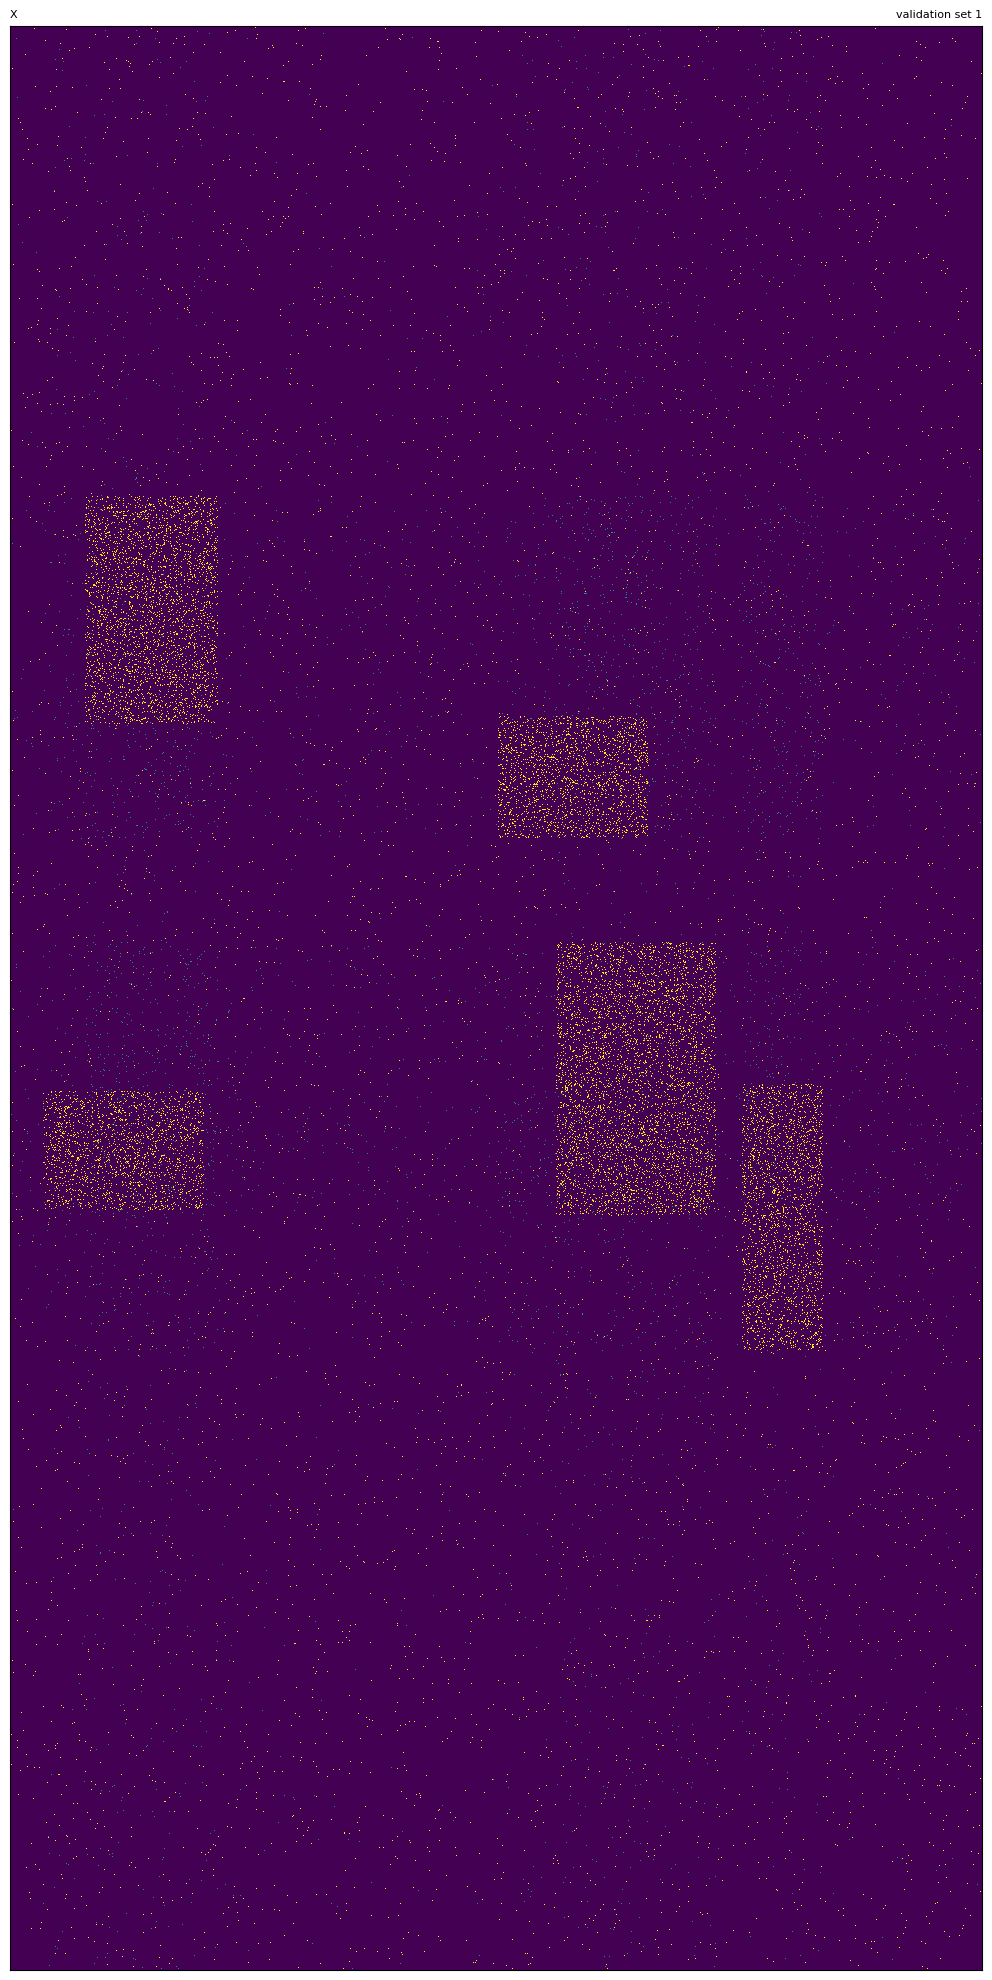

[I] Mean num of Vs per U in X: 12.3
[I] Mean num of Us per V in X: 24.5
[I] Median num of Vs per U in X: 6.0
[I] Median num of Us per V in X: 13.0


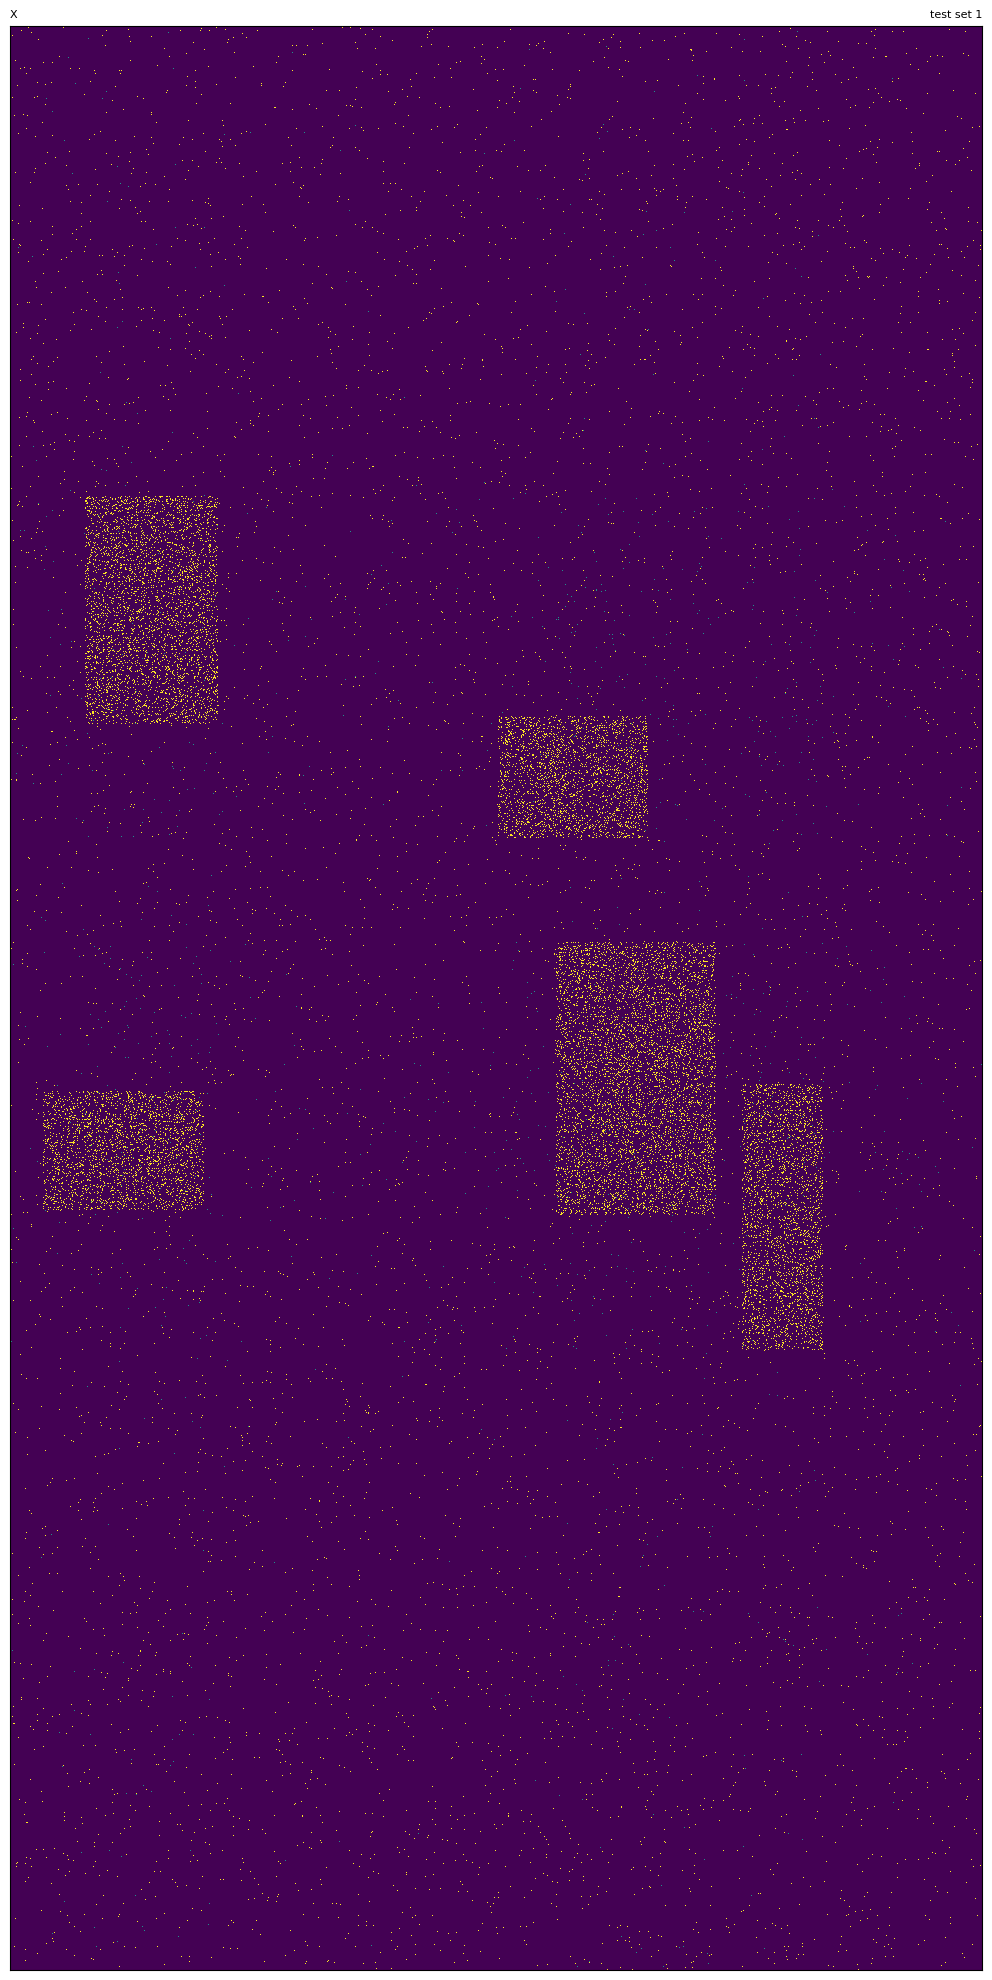

[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation set.
[I] display : True


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


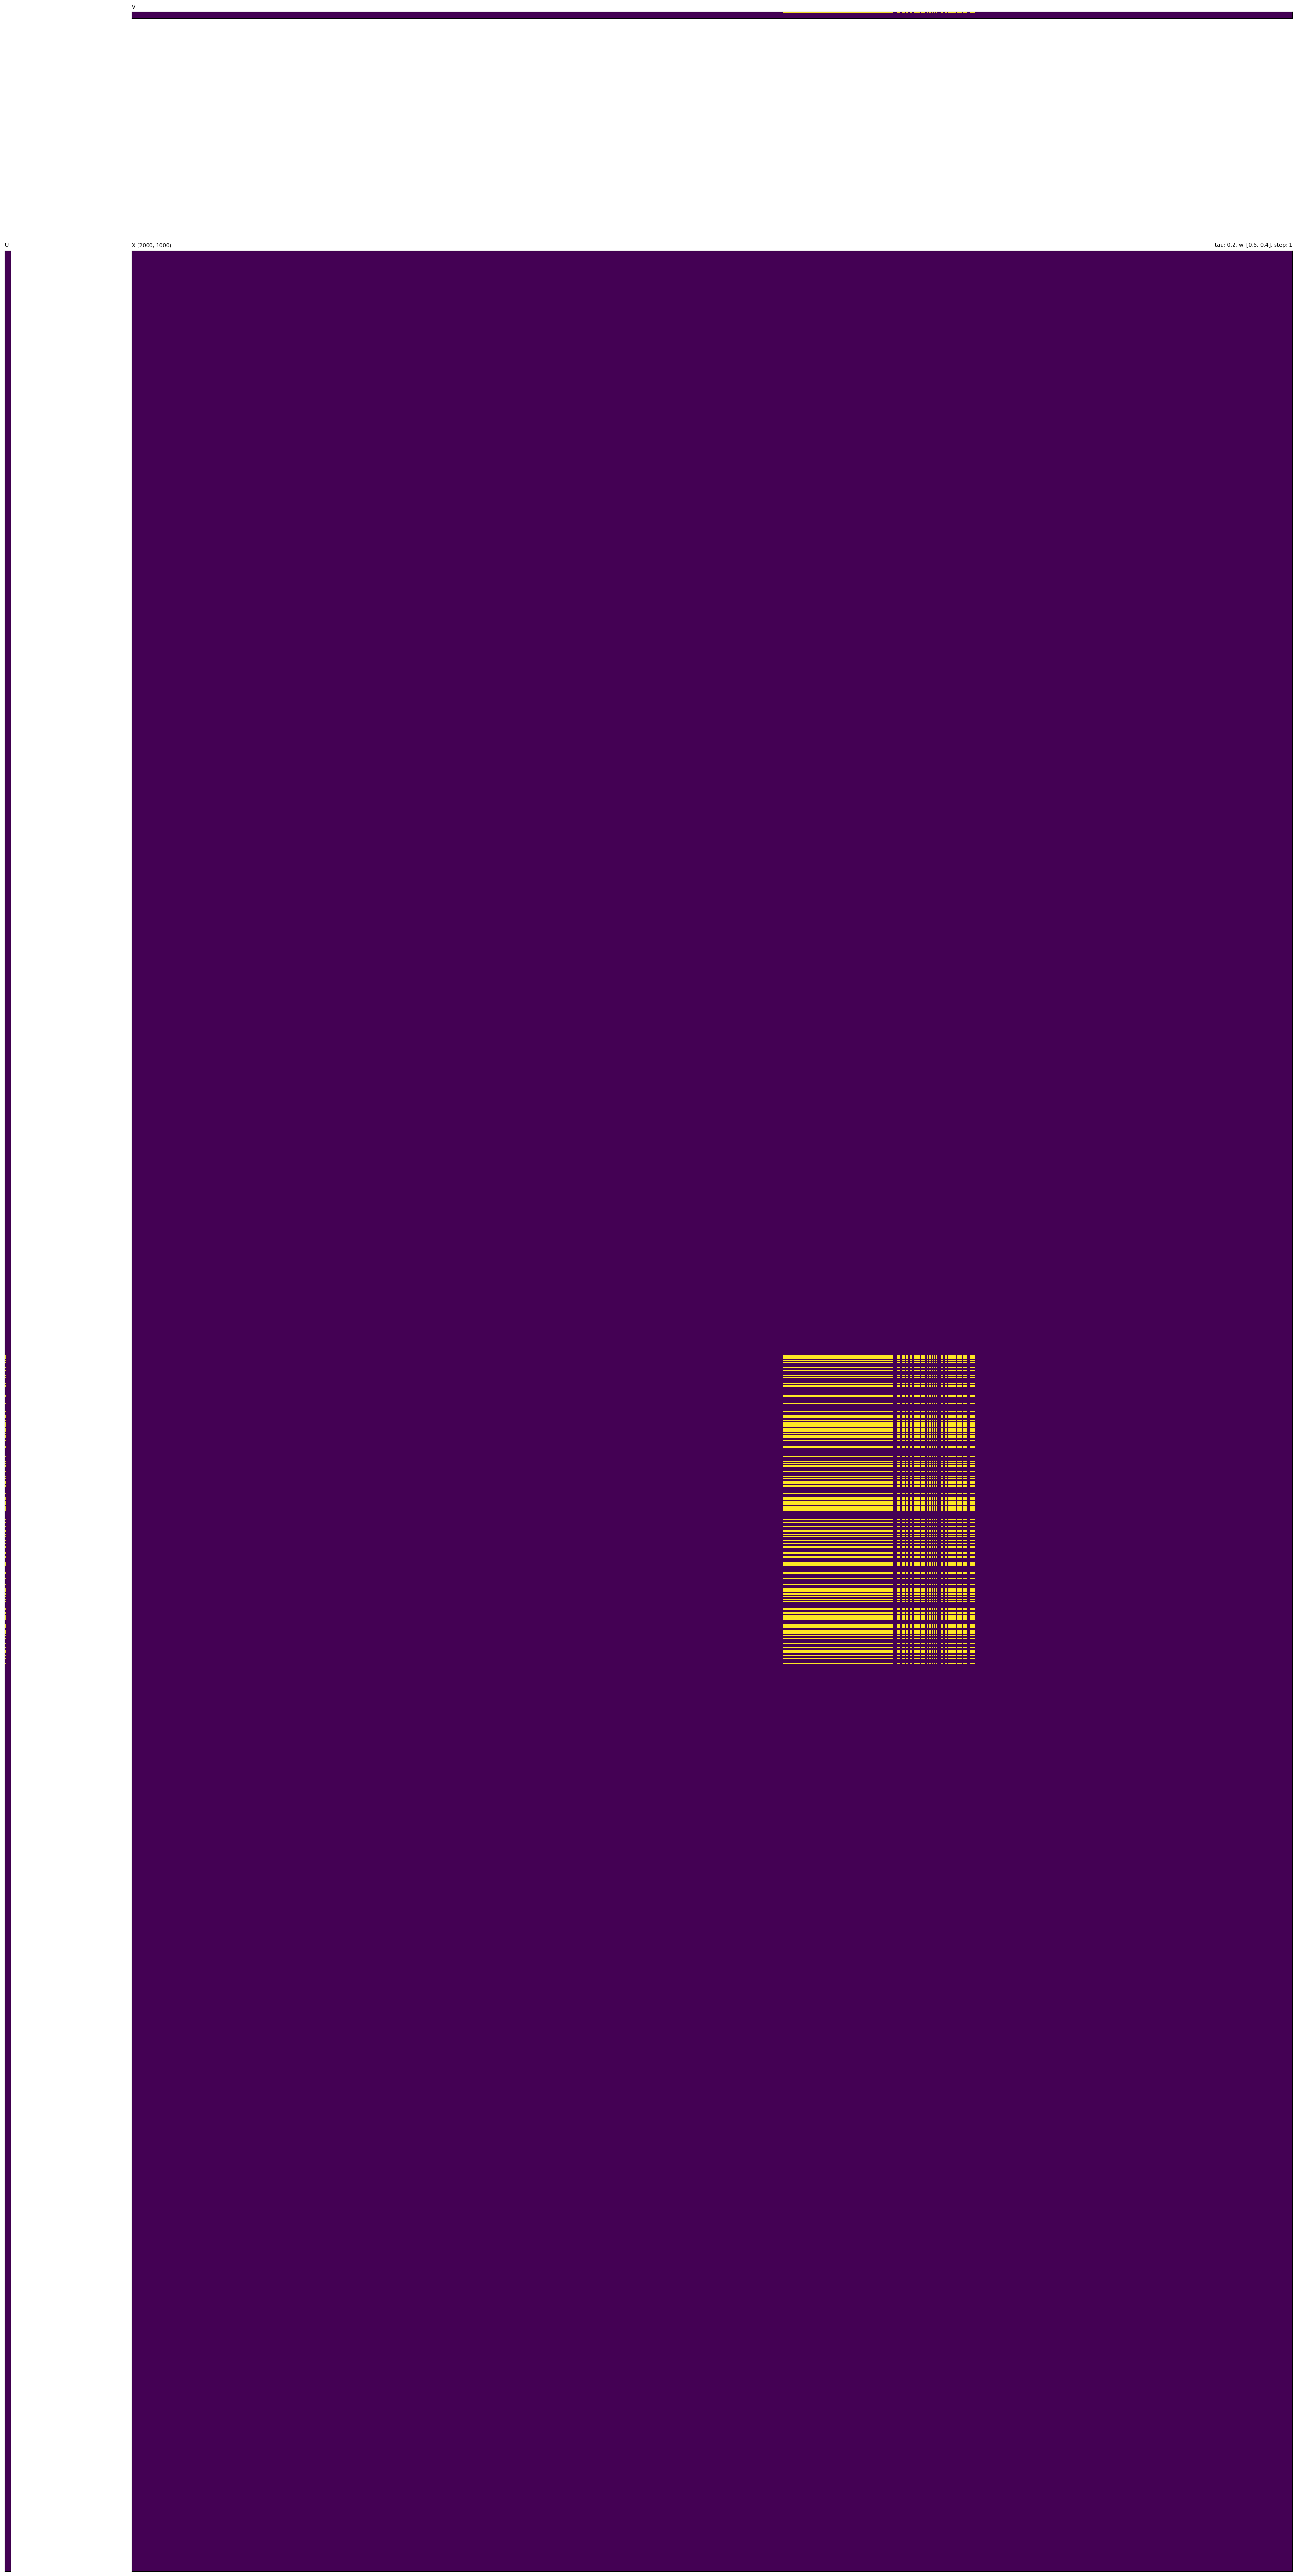

 20%|██        | 1/5 [00:17<01:11, 17.75s/it]

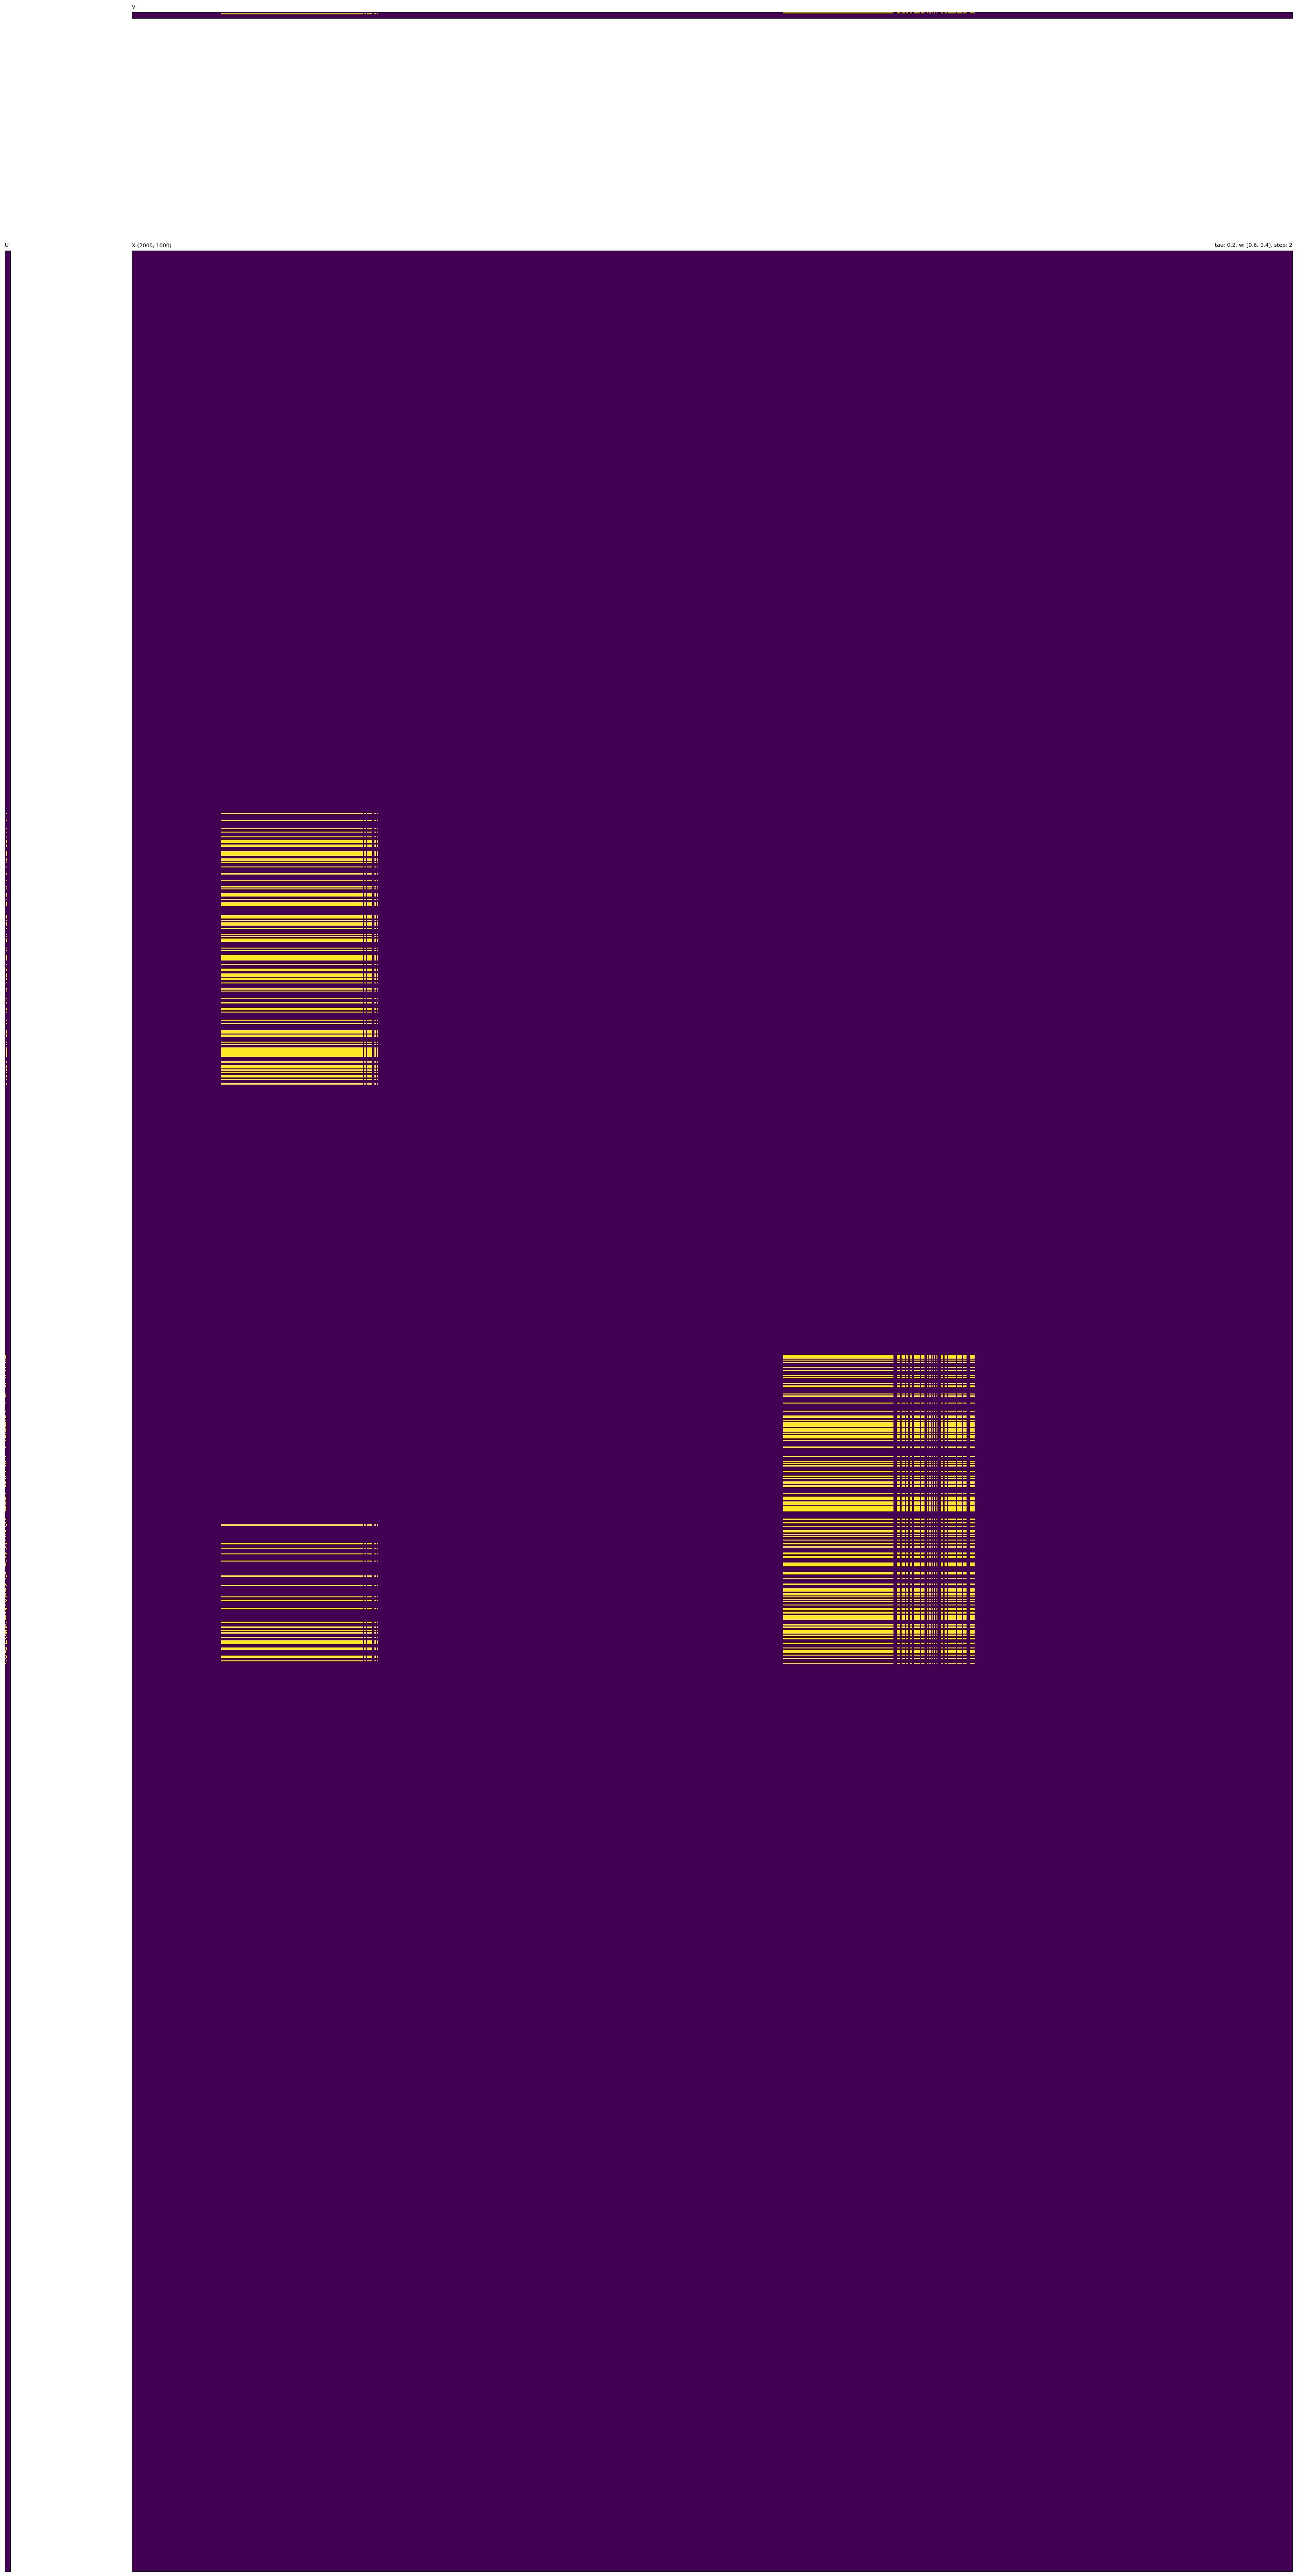

 40%|████      | 2/5 [00:36<00:54, 18.12s/it]

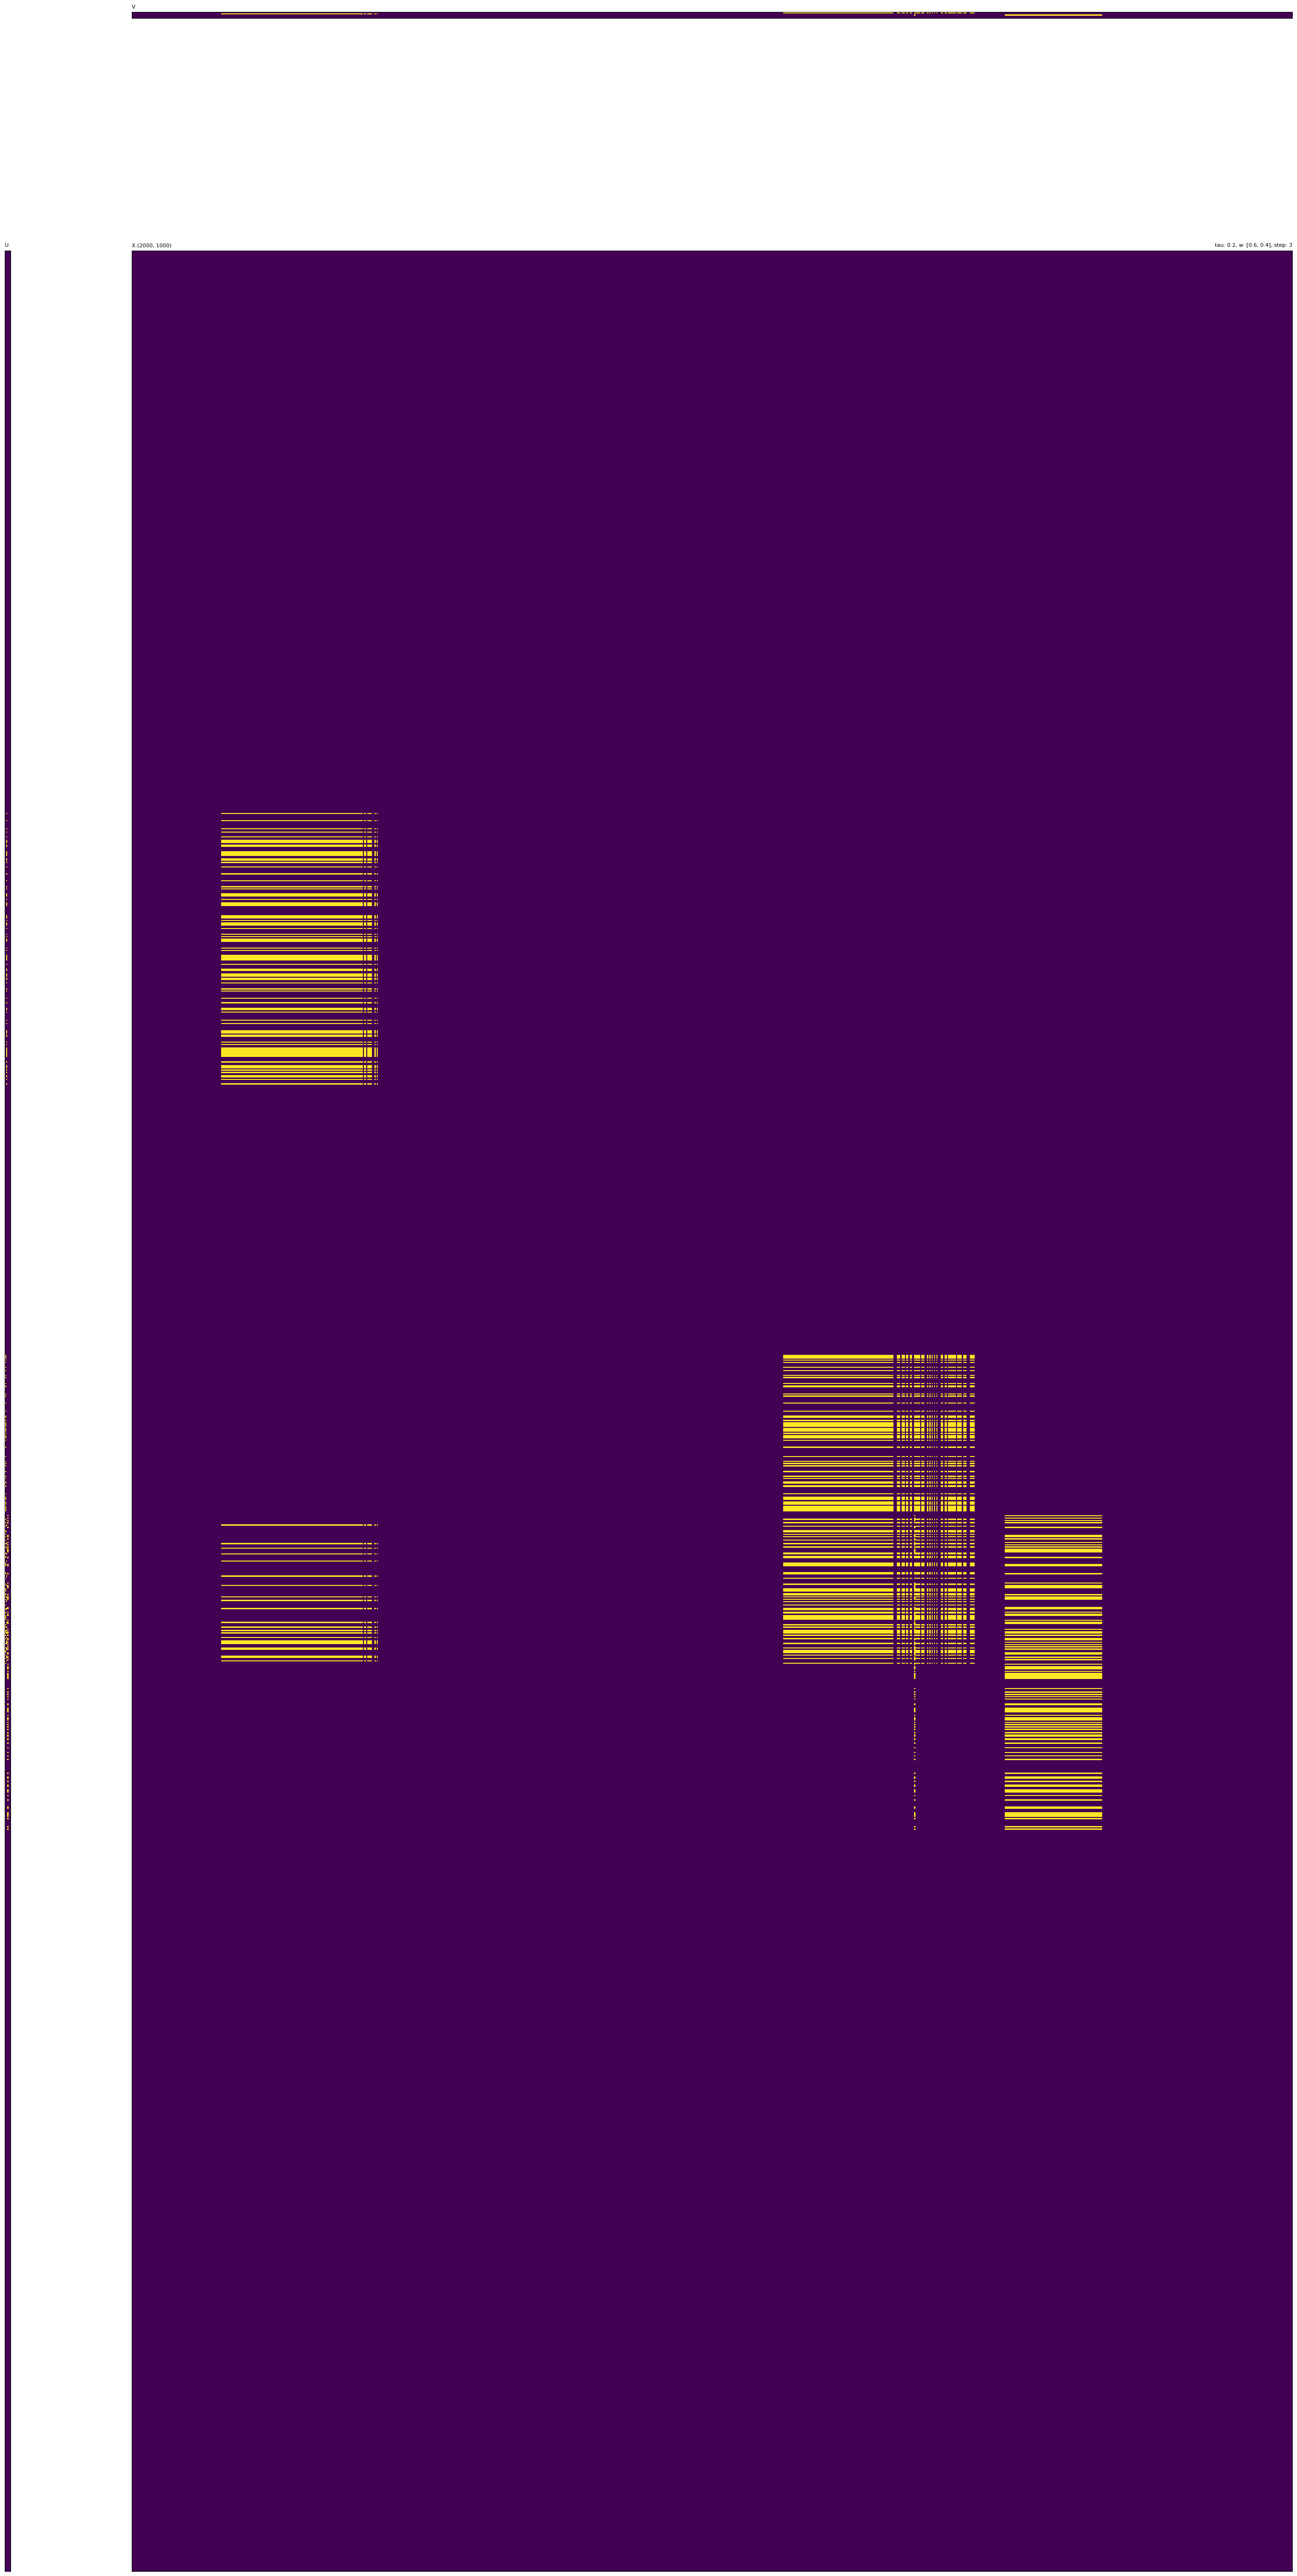

KeyboardInterrupt: 

In [8]:
from models import Asso

n_fold = 1

for i in range(n_fold):
    fold = i + 1

    X_data.cross_validation(test_size=0.2, n_folds=5, current_fold=fold, seed=1997)
    pos_train_val_size = X_data.pos_train_size + X_data.pos_val_size
    X_data.cv_negative_sample(n_folds=n_fold,
                              current_fold=fold,
                              train_val_size=int(0.05 * pos_train_val_size),
                              test_size=int(0.05 * X_data.pos_test_size), 
                              seed=6666, type='popularity')

    ds_train = Dataset()
    ds_train.load_data(X=X_data.train_data, U=X_data.U, V=X_data.V)

    ds_val = Dataset()
    ds_val.load_data(X=X_data.val_data, U=X_data.U, V=X_data.V)

    ds_test = Dataset()
    ds_test.load_data(X=X_data.test_data, U=X_data.U, V=X_data.V)

    ds_train.summarize(title='training set {}'.format(fold), display=True, pixels=2, ordered=True)
    ds_val.summarize(title='validation set {}'.format(fold), display=True, pixels=2, ordered=True)
    ds_test.summarize(title='test set {}'.format(fold), display=True, pixels=2, ordered=True)

    # grid search
    k = 5
    tau_list = [0.20] # [0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.30]
    w_list = [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
    for tau in tau_list:
        for w in w_list:
            asso = Asso(k=k, tau=tau, w=w)
            # asso._fit_prepare(train_set=ds_train, display=True)
            asso.fit(train_set=ds_train, display=True)
            tpr, fpr = asso.eval(test_set=ds_val, triplet=True)

            str = 'k: {}\t tau: {}\t w: {}\t tpr: {:.2f}\t fpr: {:.2f}\n'.format(k, tau, w, tpr, fpr)

            with open('.\output\exp01.txt', "a") as f:
                f.write(str)